# Neurona lineal

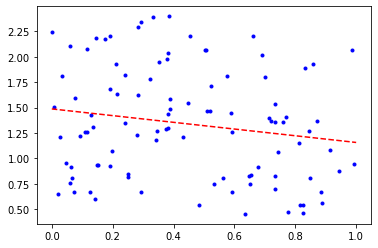

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random 

class LinearNeuron:
    def __init__(self, n_inputs, learning_rate=0.1):
        self.w = -1+ 2* np.random.rand(n_inputs)
        self.b = -1+ 2*(np.random.rand())
        self.eta = learning_rate

    def predict(self, X):
        Y_est = np.dot(self.w, X)+ self.b
        return Y_est

    
    def fit(self, X, Y, solver="BGD", epochs=500):
        p = X.shape[1]

        #Stocastic Gradient descent
        if solver == "SGD":
            for _ in range(epochs):
                for i in range(p):
                    y_est = self.predict(X[:,i])
                    self.w += self.eta * (Y[:,i] - y_est) * X[:,i]
                    self.b += self.eta * (Y[:,i] - y_est)

        elif solver == "BGD":
            for _ in range(epochs):
                Y_est = self.predict(X)
                #print(Y_est)
                self.w += (self.eta/p) * ((Y - Y_est) @ X.T).ravel()
                self.b += (self.eta/p) * (np.sum(Y - Y_est))

        elif solver == "PSEUDO":
            X_hat = np.concatenate((np.ones((1,p)), X), axis=0)
            w_hat = np.dot(Y, np.linalg.pinv(X_hat))
            self.b = w_hat[0,0]
            self.w = w_hat[0,1:]

if __name__ == "__main__":
    ##CREACION Y ALMACENAMIENTO DE DATOS
    """
    p = 100
    x = np.zeros([p])
    y = np.zeros([p])

    for i in range(p):
        x[i] = random.random()#un renglon las columnas que sean
        y[i] = (0.028 * x[i] + 0.422 + 2 *random.random())

    raw_data = {'x': x,
                    'y':  y,
                    #'IMC': Y
                    }

    #df = pd.DataFrame(raw_data, columns = ['weight', 'height', 'IMC'])
    df = pd.DataFrame(raw_data, columns = ['x', 'y'])
    df.to_csv('raw_data.csv', index=False)
    """

    ###ENTRENAMIENTO
    data = pd.read_csv("raw_data.csv")
    X = np.array(data['x'].values).reshape(1,-1)
    Y = np.array(data['y'].values).reshape(1,-1)
    #print(x)
    net = LinearNeuron(1, 0.1)
    net.fit(X,Y, solver="BGD")

    plt.plot(X,Y, '.b')

    ##PREDICCION
    xn = np.array([[0,1]])
    plt.plot(xn.ravel(), net.predict(xn), '--r')
    plt.show()

# MiniBatch

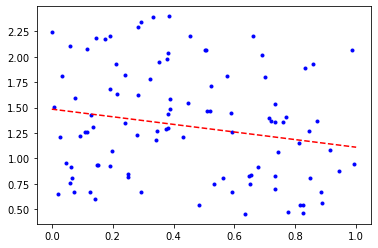

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

class LinearNeuron_MiniBatch:
    def __init__(self, n_inputs, learning_rate=0.1):
        self.w = -1+ 2* np.random.rand(n_inputs)
        self.b = -1+ 2*(np.random.rand())
        self.eta = learning_rate

    def predict(self, X):
        Y_est = np.dot(self.w, X)+ self.b
        return Y_est

    def batcher(self, X, Y, batch_size): #Funcion generadora
        p = X.shape[1]
        li, lu = 0, batch_size
        while True:
            if li < p:
                yield X[:, li:lu], Y[:, li:lu]
                li, lu = li+ batch_size, lu+batch_size
            else:
                return None
            
    def MSE(self, X, Y):
        p = X.shape[1]
        Y_est = self.predict(X)
        return(1/(2*p))*np.sum((Y-Y_est)**2)
    
    def fit(self, X, Y, epcohs=500, batch_size=20):
        error_history = []
        for _ in range(epcohs):
            minibatch = self.batcher(X, Y, batch_size)
            for mX, mY in minibatch:
                p = mX.shape[1]
                Y_est = self.predict(mX)
                self.w += (self.eta/p) * ((mY - Y_est) @ mX.T).ravel()
                self.b += (self.eta/p) * np.sum(mY - Y_est)
            error_history.append(self.MSE(X,Y))

        return error_history

if __name__ == "__main__":
    ###ENTRENAMIENTO
    data = pd.read_csv("raw_data.csv")
    X = np.array(data['x'].values).reshape(1,-1)
    Y = np.array(data['y'].values).reshape(1,-1)
    #print(X)
    net = LinearNeuron_MiniBatch(1, 0.1)
    net.fit(X,Y)

    plt.plot(X,Y, '.b')

    ##PREDICCION
    xn = np.array([[0,1]])
    plt.plot(xn.ravel(), net.predict(xn), '--r')
    plt.show()